## Import the Librairies

In [4]:
#Import the librairies
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

import seaborn as sns

#Import the dataset
data = '/Users/smileloukkade/Downloads/dmahmeq.csv'
home_df = pd.read_csv(data)
print(home_df.head())

   bad  loan  mortdue     value   reason     job   yoj  derog  delinq   clage  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   94.37   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0  121.83   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0  149.47   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   93.33   

   ninq  clno  debtinc  
0   1.0   9.0      NaN  
1   0.0  14.0      NaN  
2   1.0  10.0      NaN  
3   NaN   NaN      NaN  
4   0.0  14.0      NaN  


## 2.A1 - Data Strcuture

In [5]:
# Data Structure 
print('\n1. BASIC DATASET INFO:')
print(f'Dataset shape: {home_df.shape}')
print(f'Dataset rows: {home_df.shape[0]}')
print(f'Dataset columns: {home_df.shape[1]}')

print('\n2. COLUMN INFORMATION:')
print(home_df.info())

print('\n3. DATA TYPES:')
print(home_df.dtypes)
numeric_variables = ['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage','ninq','clno','debtinc']
categorical_variables = ['reason', 'job']
print("Numerical Variables Columns:", numeric_variables)
print("Categorical Variables Columns:", categorical_variables)


# Missing Value 
print('\n4. MISSING VALUES COUNT:')
missing_values = home_df.isnull().sum() 
print(missing_values)

# Looking into the categorical values
print('\n5. CATEGORICAL VALUES:')
for col in categorical_variables:
  print(f"\nValue counts for {col}:")
  print(home_df[col].value_counts())  

# Summary statistics 
print('\n6. SUMMARY STATISTICS:')
home_df.describe()


1. BASIC DATASET INFO:
Dataset shape: (5960, 13)
Dataset rows: 5960
Dataset columns: 13

2. COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      5960 non-null   int64  
 1   loan     5960 non-null   int64  
 2   mortdue  5442 non-null   float64
 3   value    5848 non-null   float64
 4   reason   5708 non-null   object 
 5   job      5681 non-null   object 
 6   yoj      5445 non-null   float64
 7   derog    5252 non-null   float64
 8   delinq   5380 non-null   float64
 9   clage    5652 non-null   float64
 10  ninq     5450 non-null   float64
 11  clno     5738 non-null   float64
 12  debtinc  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None

3. DATA TYPES:
bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766276,1.186055,21.296096,33.779918
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810108,1.728675,10.138933,8.601747
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524000
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.117500,0.000000,15.000000,29.140000
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.470000,1.000000,20.000000,34.818000
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562500,2.000000,26.000000,39.003000
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


## 2.A1 - Data Vizualisation

### Heat Map

   bad  loan  mortdue     value   reason     job   yoj  derog  delinq   clage  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   94.37   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0  121.83   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0  149.47   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   93.33   

   ninq  clno  debtinc  
0   1.0   9.0      NaN  
1   0.0  14.0      NaN  
2   1.0  10.0      NaN  
3   NaN   NaN      NaN  
4   0.0  14.0      NaN  
   bad  loan  mortdue     value   reason     job   yoj  derog  delinq   clage  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   94.37   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0  121.83   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0  149.47   
3    1  1500      NaN       NaN      Na

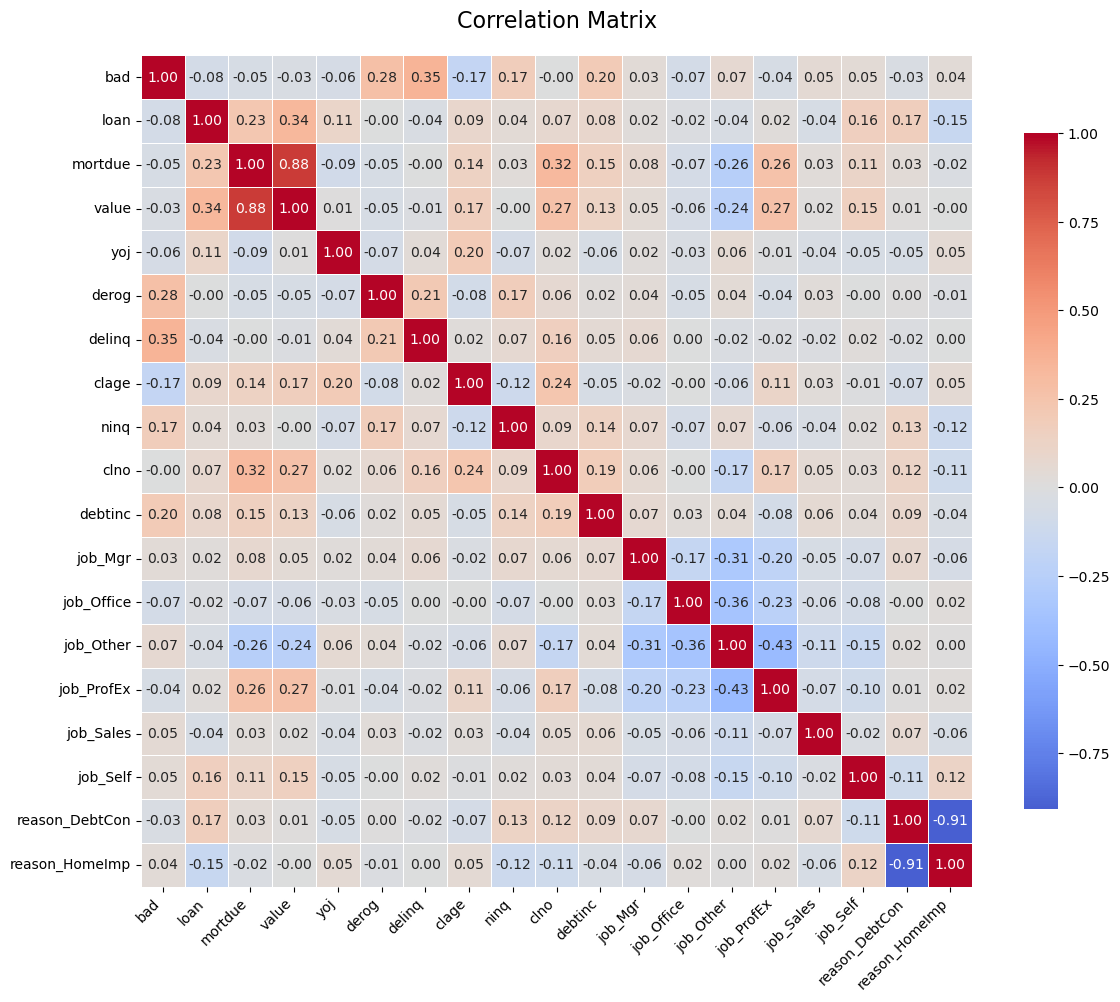

In [6]:
data = '/Users/smileloukkade/Downloads/dmahmeq.csv'
home_df = pd.read_csv(data)
print(home_df.head())
home_df_model = home_df.copy()
print(home_df_model.head())

home_df_model = pd.get_dummies(home_df_model, columns=["job", "reason"], drop_first = False, dtype = 'int')

print("\nNew features:")
print(home_df_model.columns.tolist())
print(f"\nShape: {home_df_model.shape}")

# Calculate correlation matrix
corr_train = home_df_model.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5, center=0)                
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()                   
plt.show()

### Scatterplots

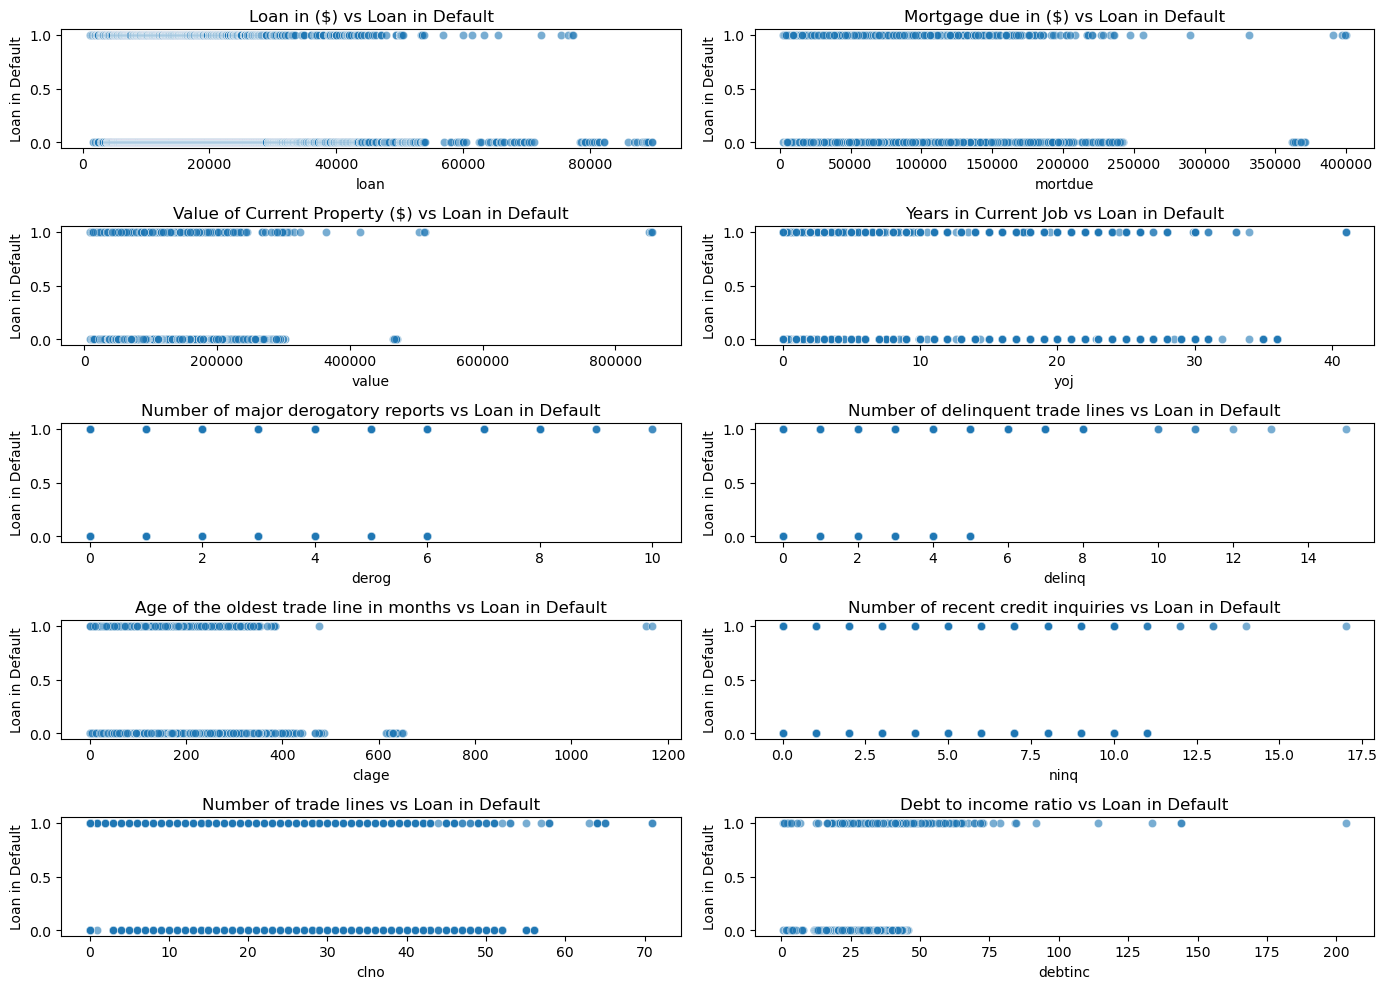

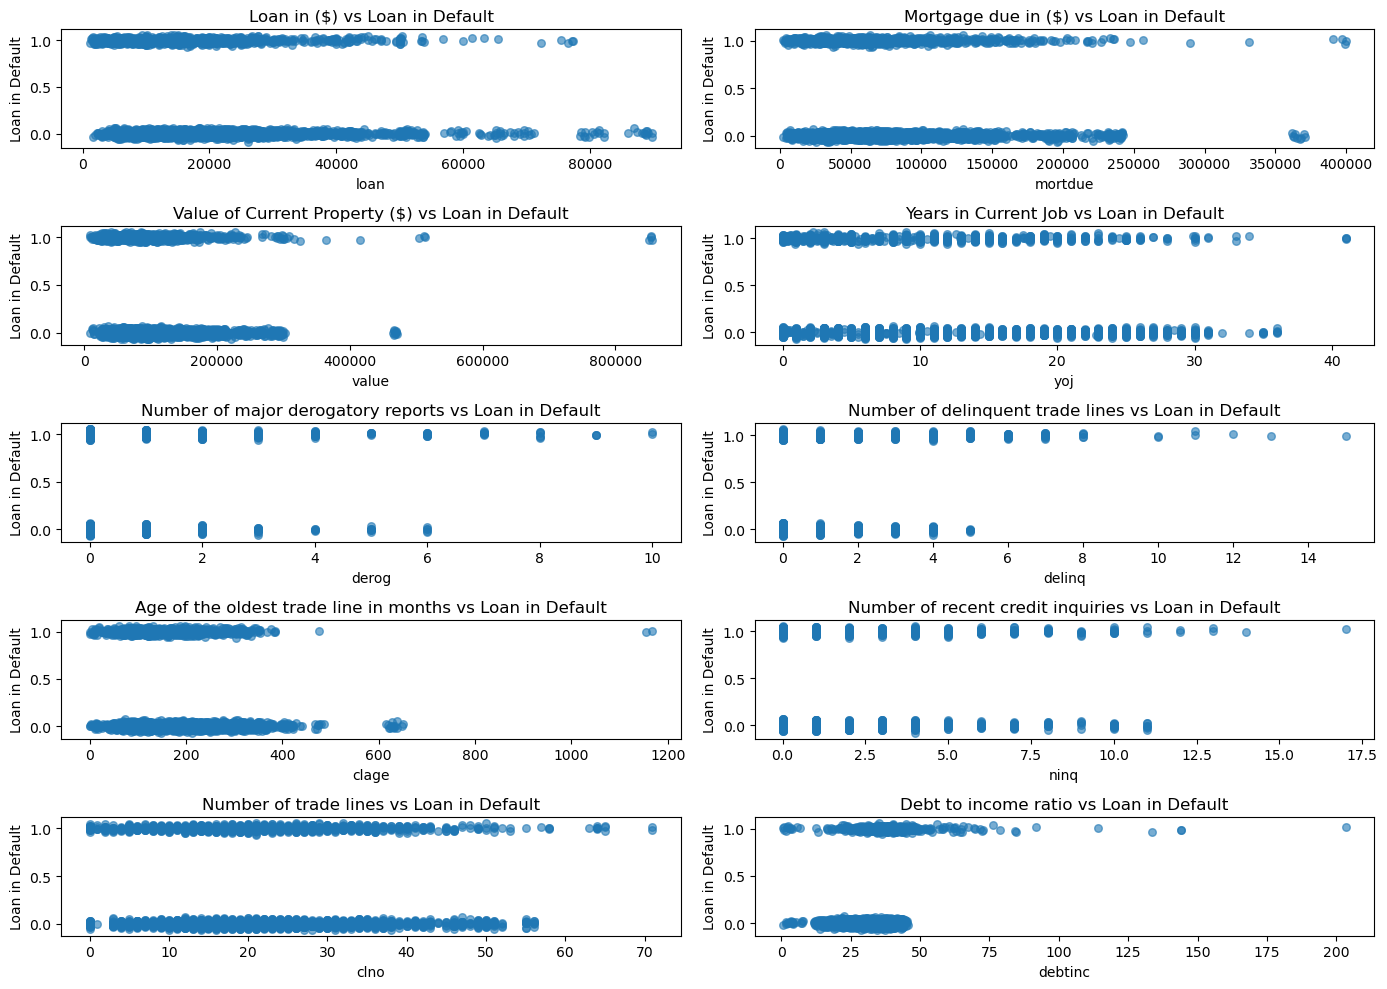

In [7]:
#Scatter charts (numerical vs bad)
scatter_vars = ['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage','ninq','clno','debtinc']
titles = [
  "Loan in ($)", "Mortgage due in ($)",
    "Value of Current Property ($)", "Years in Current Job", 
    "Number of major derogatory reports", "Number of delinquent trade lines", "Age of the oldest trade line in months",
    "Number of recent credit inquiries","Number of trade lines","Debt to income ratio"
]
fig, axes = plt.subplots(5, 2, figsize=(14, 10))
axes = axes.ravel()
for i, col in enumerate(scatter_vars):
    sns.scatterplot(data=home_df, x=col, y='bad', ax=axes[i], alpha=0.6)
    axes[i].set_title(f"{titles[i]} vs Loan in Default")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Loan in Default")
plt.tight_layout()
plt.show()

#Scatter charts (numerical vs bad) with noise
scatter_vars = ['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq',
                'clage', 'ninq', 'clno', 'debtinc', 
               ]
titles = [
  "Loan in ($)", "Mortgage due in ($)",
    "Value of Current Property ($)", "Years in Current Job", 
    "Number of major derogatory reports", "Number of delinquent trade lines", "Age of the oldest trade line in months",
    "Number of recent credit inquiries","Number of trade lines","Debt to income ratio",
        ]
fig, axes = plt.subplots(5, 2, figsize=(14, 10))
axes = axes.ravel()
for i, col in enumerate(scatter_vars):
    # Add jitter to the 'bad' column for better visualization
    jittered_bad = home_df['bad'] + np.random.normal(0, 0.02, size=len(home_df))
    axes[i].scatter(home_df[col], jittered_bad, alpha=0.6, s=30)
    axes[i].set_title(f"{titles[i]} vs Loan in Default")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Loan in Default")
plt.tight_layout()
plt.show()

### Histograms

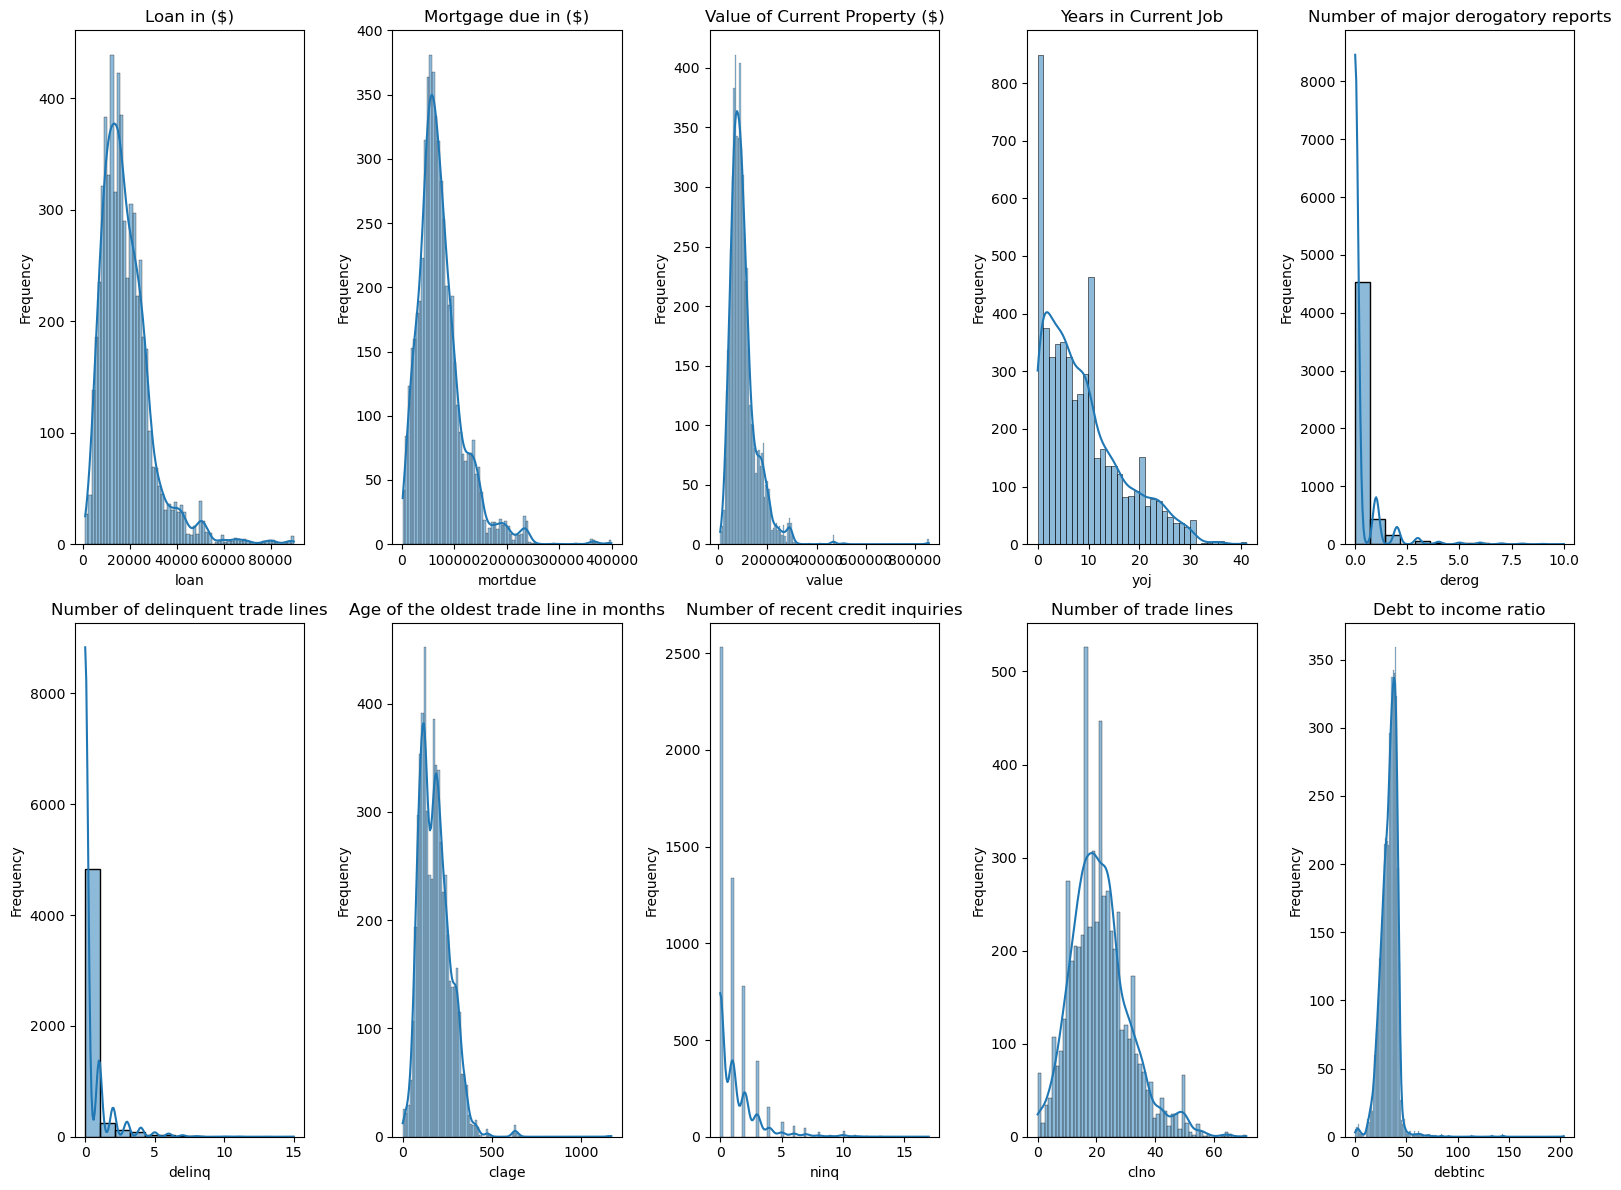

In [8]:
# Create a list of titles 
titles = [
     "Loan in ($)", "Mortgage due in ($)",
    "Value of Current Property ($)", "Years in Current Job", 
    "Number of major derogatory reports", "Number of delinquent trade lines", "Age of the oldest trade line in months",
    "Number of recent credit inquiries","Number of trade lines","Debt to income ratio" ]
# Prepare the variables
histo_vars = ['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage','ninq','clno','debtinc']
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 5, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easier indexing
for i, col in enumerate(histo_vars):
    sns.histplot(data=home_df, x=col, kde=True, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

### Bar Charts

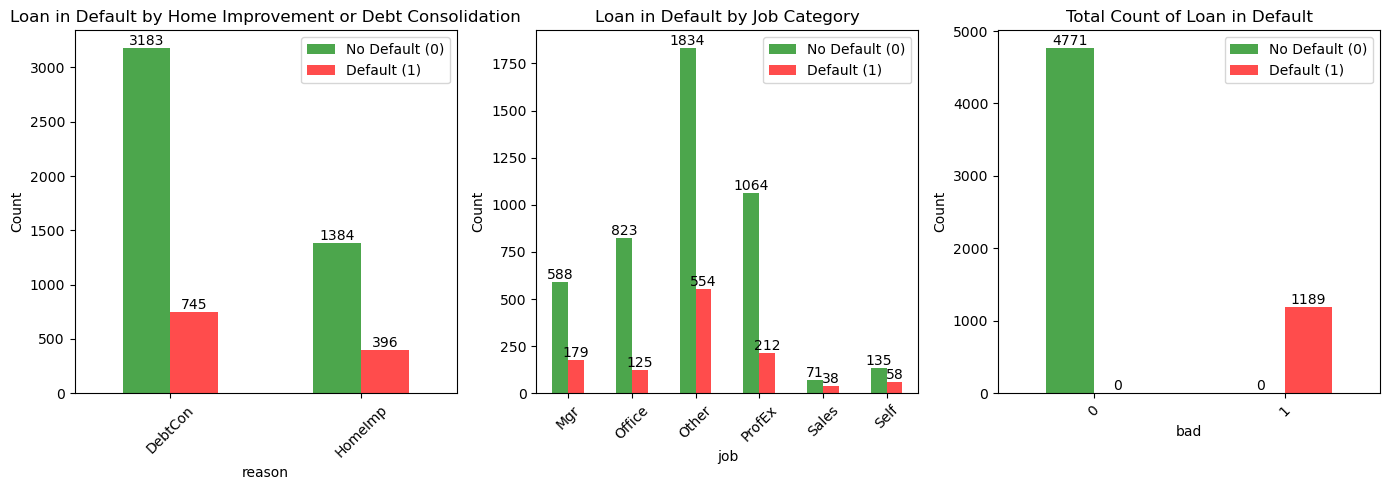

In [9]:
# Create a list of titles 
titles = ["Loan in Default by Home Improvement or Debt Consolidation", "Loan in Default by Job Category", 'Total Count of Loan in Default']
# Prepare the variables
bars_vars = ['reason', 'job', 'bad']
# Bar charts for categorical counts
fig, axes = plt.subplots(1, 3, figsize=(14, 5)) 
axes = axes.ravel() 

for i, cat_col in enumerate(bars_vars):
    # Create crosstab to count defaults vs non-defaults
    counts = pd.crosstab(home_df[cat_col], home_df['bad'])
    counts.plot(kind='bar', ax=axes[i], color=['green', 'red'], alpha=0.7)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel("Count")
    axes[i].legend(['No Default (0)', 'Default (1)'], loc='upper right')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

 #Add count labels on top of each bar
    for patch in axes[i].patches:
        axes[i].text(patch.get_x() + patch.get_width()/2., patch.get_height(),
                     f'{int(patch.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 2.A2 - Association with loan default

## 2.A3 - Variables’ distributions

Log transformed variables: ['loan', 'mortdue', 'value', 'clage', 'clno', 'debtinc']
Scaled and Log transformed variables: ['delinq', 'ninq', 'yoj']

Transformed data:
   bad      loan    mortdue      value   reason     job       yoj  derog  \
0    1  7.003974  10.160491  10.571983  HomeImp   Other  2.442347    0.0   
1    1  7.170888  11.157022  11.133143  HomeImp   Other  2.079442    0.0   
2    1  7.313887   9.510519   9.723224  HomeImp   Other  1.609438    0.0   
3    1  7.313887        NaN        NaN      NaN     NaN       NaN    NaN   
4    0  7.438972  11.490690  11.626263  HomeImp  Office  1.386294    0.0   

     delinq     clage      ninq      clno  debtinc  
0  0.000000  4.557764  0.693147  2.302585      NaN  
1  1.098612  4.810801  0.000000  2.708050      NaN  
2  0.000000  5.013764  0.693147  2.397895      NaN  
3       NaN       NaN       NaN       NaN      NaN  
4  0.000000  4.546799  0.000000  2.708050      NaN  

Shape: (5960, 13)


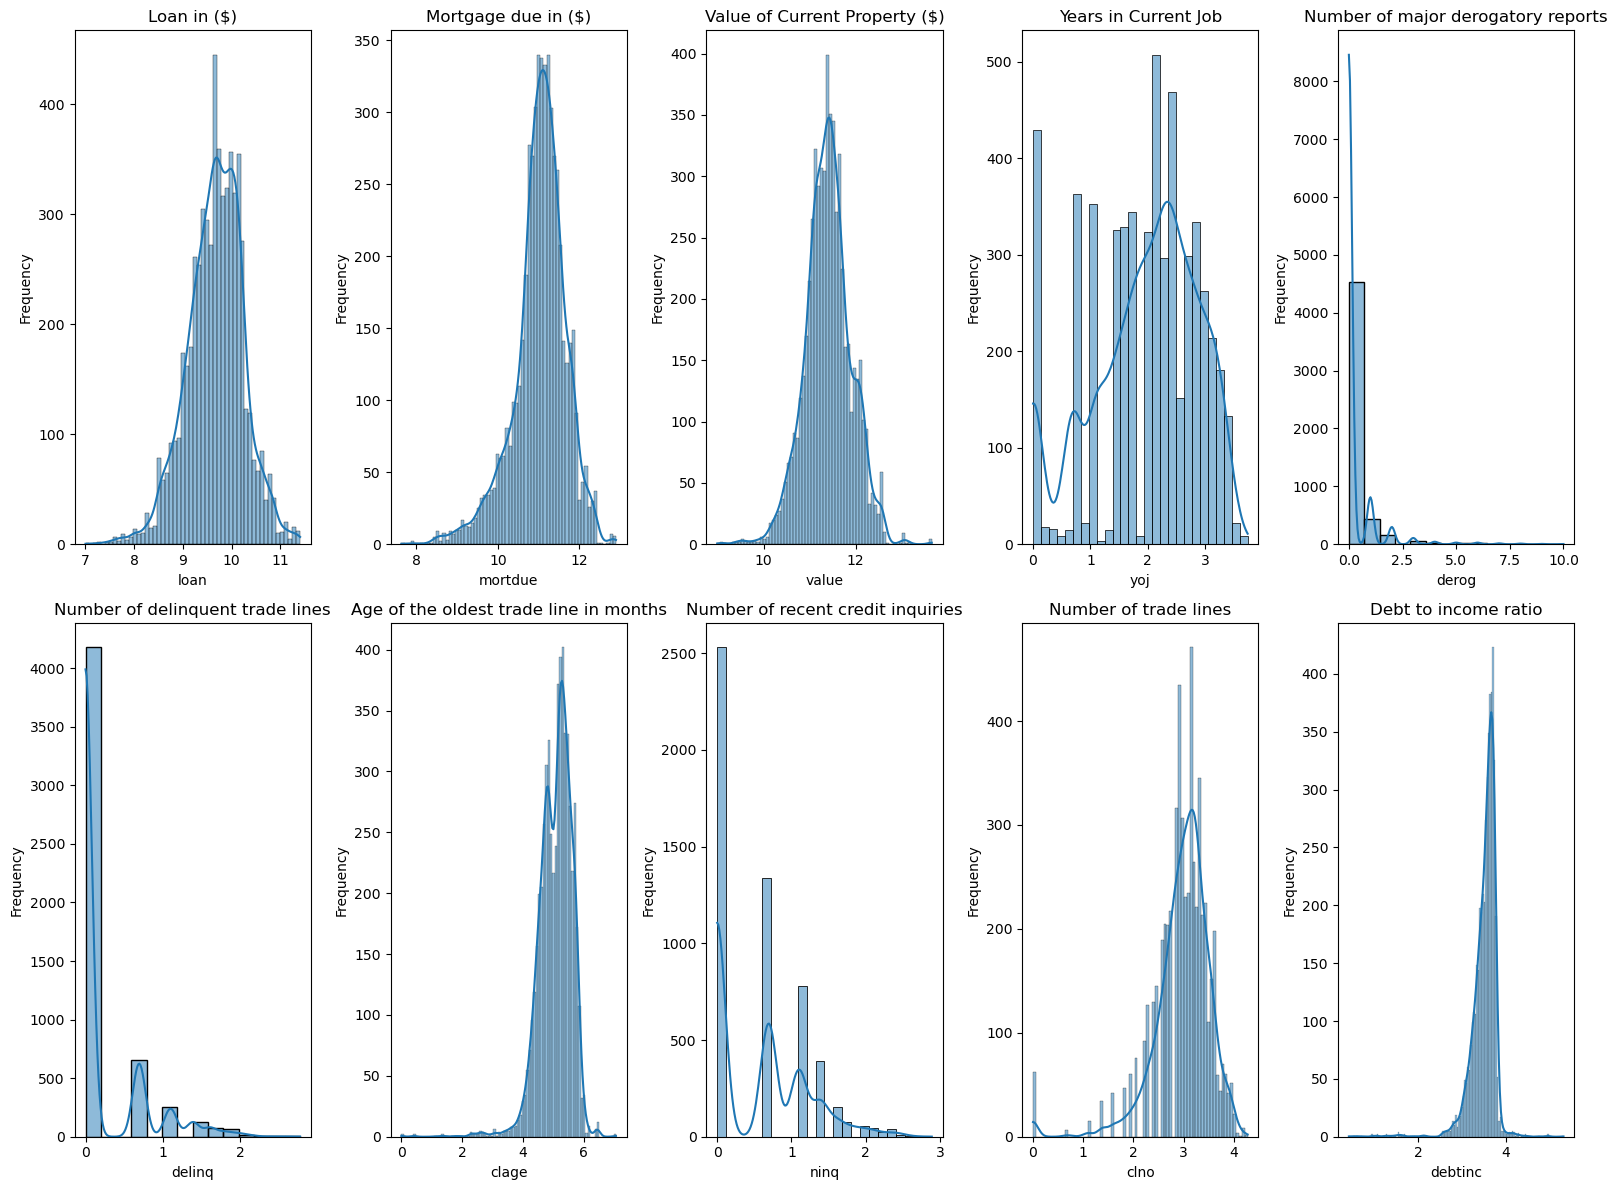

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Variables to log transform
log_vars = ['loan', 'mortdue', 'value', 'clage', 'clno', 'debtinc']
# Variables to scale and log transform
scale_vars = ['delinq', 'ninq', 'yoj']

# Log transform (add 1 to avoid log(0))
for col in log_vars:
    home_df[col] = np.log1p(home_df[col])
# Log transform (add 1 to avoid log(0))
for col in scale_vars:
    home_df[col] = np.log1p(home_df[col])

print("Log transformed variables:", log_vars)
print("Scaled and Log transformed variables:", scale_vars)
print("\nTransformed data:")
print(home_df.head())
print(f"\nShape: {home_df.shape}")

# Create a list of titles 
titles = [
    "Loan in ($)", "Mortgage due in ($)",
    "Value of Current Property ($)", "Years in Current Job", 
    "Number of major derogatory reports", "Number of delinquent trade lines", 
    "Age of the oldest trade line in months",
    "Number of recent credit inquiries","Number of trade lines","Debt to income ratio" 
]

# Prepare the variables
histo_vars = ['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage','ninq','clno','debtinc']

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 5, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(histo_vars):
    sns.histplot(data=home_df, x=col, kde=True, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

## 2.A4 - Impoute missing Variables

In [11]:
# Where are the missing values?
missing_vals = home_df.isnull().sum()
# Display the columns with missing values  
missing_vals.index[missing_vals>0]
missing_num_vals = ['mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']

# Imput the missing values with the mean of the column using sklearn's SimpleImputer
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit the imputer on the DataFrame
home_df[missing_num_vals] = imp_mean.fit_transform(home_df[missing_num_vals])
home_df['reason'] = home_df['reason'].fillna(home_df['reason'].mode()[0])
home_df['job'] = home_df['job'].fillna(home_df['job'].mode()[0])

# Verify no missing values remain
print(home_df.isnull().sum())
print(home_df.head())

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64
   bad      loan    mortdue      value   reason     job       yoj    derog  \
0    1  7.003974  10.160491  10.571983  HomeImp   Other  2.442347  0.00000   
1    1  7.170888  11.157022  11.133143  HomeImp   Other  2.079442  0.00000   
2    1  7.313887   9.510519   9.723224  HomeImp   Other  1.609438  0.00000   
3    1  7.313887  11.027948  11.403504  DebtCon   Other  1.942484  0.25457   
4    0  7.438972  11.490690  11.626263  HomeImp  Office  1.386294  0.00000   

     delinq     clage      ninq      clno   debtinc  
0  0.000000  4.557764  0.693147  2.302585  3.514631  
1  1.098612  4.810801  0.000000  2.708050  3.514631  
2  0.000000  5.013764  0.693147  2.397895  3.514631  
3  0.224670  5.074128  0.568083  2.977593  3.514631  
4  0.000000  4.546799  0.000000  2.708050  3.514631  


## 2.A5 - Partition the data 50/30/20% respectively (Use random_state=42)

In [12]:
from sklearn.model_selection import train_test_split

#Split the data into temp and test sets
temp_df, train_df = train_test_split(home_df, test_size=0.5, random_state=42)

#Split the data into train and validation sets
test_df, validation_df = train_test_split(temp_df, test_size=0.6, random_state=42)

#Print the shapes
print(f"Train set: {train_df.shape[0]}")
print(f"Validation shape: {validation_df.shape[0]}")
print(f"Test shape: {test_df.shape[0]}")



Train set: 2980
Validation shape: 1788
Test shape: 1192


In [13]:
test_df.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000
mean,0.177852,9.662718,11.045701,11.416223,1.941975,0.225613,0.213379,5.096629,0.555010,2.985206,3.518836
std,0.382549,0.577005,0.610999,0.503132,0.900593,0.729596,0.427326,0.494182,0.592086,0.560968,0.264624
min,0.000000,7.438972,7.632401,9.159152,0.000000,0.000000,0.000000,1.340250,0.000000,0.000000,0.421338
25%,0.000000,9.305741,10.788839,11.113693,1.386294,0.000000,0.000000,4.791711,0.000000,2.772589,3.471624
50%,0.000000,9.686637,11.040880,11.403504,1.945910,0.000000,0.000000,5.145778,0.568083,3.044522,3.514631
75%,0.000000,10.043293,11.407623,11.707056,2.639057,0.000000,0.224670,5.452347,1.098612,3.295837,3.663267
max,1.000000,11.394153,12.892447,13.659921,3.737670,10.000000,2.564949,7.052401,2.484907,4.276666,4.901772


## 2. Predict the risk of defaulting on loan by constructing a neural network (30 points).


In [14]:
# Data Cleaning

## 1. Covert Categorical varibale to numerical variable [reason and job] using one-hot encoding
home_df_clean = pd.get_dummies(home_df, columns=['reason', 'job'], drop_first=True, dtype='int')

# 2. Keep only numeric columns
home_df_clean = home_df_clean.select_dtypes(include=[np.number, bool])

# 3. Inspect the result
print(home_df_clean.shape)
print("Columns in cleaned DataFrame:")
print(home_df_clean.columns.tolist())

home_df_clean.head(10)

(5960, 17)
Columns in cleaned DataFrame:
['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc', 'reason_HomeImp', 'job_Office', 'job_Other', 'job_ProfEx', 'job_Sales', 'job_Self']


,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_HomeImp,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,1,7.003974,10.160491,10.571983,2.442347,0.00000,0.000000,4.557764,0.693147,2.302585,3.514631,1,0,1,0,0,0
1,1,7.170888,11.157022,11.133143,2.079442,0.00000,1.098612,4.810801,0.000000,2.708050,3.514631,1,0,1,0,0,0
2,1,7.313887,9.510519,9.723224,1.609438,0.00000,0.000000,5.013764,0.693147,2.397895,3.514631,1,0,1,0,0,0
3,1,7.313887,11.027948,11.403504,1.942484,0.25457,0.224670,5.074128,0.568083,2.977593,3.514631,0,0,1,0,0,0
4,0,7.438972,11.490690,11.626263,1.386294,0.00000,0.000000,4.546799,0.000000,2.708050,3.514631,1,1,0,0,0,0
5,1,7.438972,10.327087,10.604628,2.302585,0.00000,0.000000,4.629570,0.693147,2.197225,3.640582,1,0,1,0,0,0
6,1,7.496097,10.792407,10.951473,1.791759,3.00000,1.098612,4.357990,0.693147,2.890372,3.514631,1,0,1,0,0,0
7,1,7.496097,10.257765,10.669769,2.484907,0.00000,0.000000,4.497251,0.000000,2.197225,3.634555,1,0,1,0,0,0
8,1,7.601402,10.395161,10.752377,1.386294,0.00000,1.098612,5.384174,0.693147,2.564949,3.514631,1,0,1,0,0,0
9,1,7.601402,11.027948,11.038930,2.833213,0.00000,0.000000,4.760463,0.000000,2.639057,3.514631,1,0,0,0,1,0


In [15]:
# Where are the missing values?
missing_vals = home_df_clean.isnull().sum()
missing_vals

bad               0
loan              0
mortdue           0
value             0
yoj               0
derog             0
delinq            0
clage             0
ninq              0
clno              0
debtinc           0
reason_HomeImp    0
job_Office        0
job_Other         0
job_ProfEx        0
job_Sales         0
job_Self          0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

# Correct: split the CLEAN, encoded dataset
temp_df, train_df = train_test_split(home_df_clean, test_size=0.5, random_state=42)
test_df, validation_df = train_test_split(temp_df, test_size=0.6, random_state=42)

print("Train:", train_df.shape)
print("Validation:", validation_df.shape)
print("Test:", test_df.shape)


Train: (2980, 17)
Validation: (1788, 17)
Test: (1192, 17)


In [17]:
# Define target and feature columns
target_col = 'bad'
feature_cols = [col for col in home_df_clean.columns if col != target_col]

# Training set
X_train = train_df[feature_cols]
y_train = train_df[target_col]

# Validation set
X_valid = validation_df[feature_cols]
y_valid = validation_df[target_col]

# Test set
X_test = test_df[feature_cols]
y_test = test_df[target_col]

print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)


X_train: (2980, 16)
X_valid: (1788, 16)
X_test: (1192, 16)


In [18]:
print(train_df.columns)

Index(['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage',
       'ninq', 'clno', 'debtinc', 'reason_HomeImp', 'job_Office', 'job_Other',
       'job_ProfEx', 'job_Sales', 'job_Self'],
      dtype='object')


In [31]:
# Standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler

#create scaler
std_scaler = StandardScaler()

# Fit the scaler on the training data only
std_scaler.fit(X_train) 

# Transform all splits 
X_train_std = pd.DataFrame(std_scaler.transform(X_train), columns=X_train.columns)
X_valid_std = pd.DataFrame(std_scaler.transform(X_valid), columns=X_valid.columns)
X_test_std = pd.DataFrame(std_scaler.transform(X_test), columns=X_test.columns)

In [30]:
#Tune the Model
#import the mlp classifier
from sklearn.neural_network import MLPClassifier

# Create a MLPClassifier with a random state for reproducibility
mlp_clf = MLPClassifier(random_state=42, max_iter=500, solver= 'adam')

# Define the param_grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(128,), (128, 64), (32,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}   

from sklearn.model_selection import GridSearchCV
# Create a GridSearchCV object with the MLPClassifier and the param_grid
gs = GridSearchCV(mlp_clf, param_grid, 
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=0,
                           return_train_score=True)

# Fit the grid search on the training data
gs.fit(X_train_std, y_train)
m_mlp = gs.best_estimator_
print("Best parameters: ", gs.best_params_) 

/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_

Best parameters:  {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64)}


**Note**: Hyperparameter tuning helped us find the neural network that works best for this dataset.
The best model had two hidden layers (128 and 64 nodes), used tanh activation, and needed a small amount of L2 regularization (α = 0.001)

# 2.B1 Train a neural network classifier with 1 hidden layer and 9 hidden nodes in that layer

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Model 1
model1 = MLPClassifier(
    hidden_layer_sizes=(9,),      
    activation='relu',      # default activation
    solver='adam',                
    max_iter=500,
    random_state=42
)

# Train on standardized training data
model1.fit(X_train_std, y_train)

# Predict on validation
valid_pred_1 = model1.predict(X_valid_std)
valid_prob_1 = model1.predict_proba(X_valid_std)[:, 1]

# Evaluate
valid_acc_1 = accuracy_score(y_valid, valid_pred_1)
valid_auc_1 = roc_auc_score(y_valid, valid_prob_1)

print("Model 1 - Validation Accuracy:", valid_acc_1)
print("Model 1 - Validation AUC:", valid_auc_1)
print("Confusion Matrix:\n", confusion_matrix(y_valid, valid_pred_1))


Model 1 - Validation Accuracy: 0.8579418344519015
Model 1 - Validation AUC: 0.8095285198784502
Confusion Matrix:
 [[1377   59]
 [ 195  157]]


### 2.B2 Train a neural network classifier with 3 hidden layers and 3 hidden nodes in each layer

In [33]:
# Model 2
model2 = MLPClassifier(
    hidden_layer_sizes=(3, 3, 3),  
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

model2.fit(X_train_std, y_train)

valid_pred_2 = model2.predict(X_valid_std)
valid_prob_2 = model2.predict_proba(X_valid_std)[:, 1]

valid_acc_2 = accuracy_score(y_valid, valid_pred_2)
valid_auc_2 = roc_auc_score(y_valid, valid_prob_2)

print("Model 2 - Validation Accuracy:", valid_acc_2)
print("Model 2 - Validation AUC:", valid_auc_2)
print("Confusion Matrix:\n", confusion_matrix(y_valid, valid_pred_2))

Model 2 - Validation Accuracy: 0.8120805369127517
Model 2 - Validation AUC: 0.7761893833881996
Confusion Matrix:
 [[1324  112]
 [ 224  128]]


### 2.B3 (1) Compare the 2 neural network models on validation and test sets

In [36]:
# Model 1: Validation Matrix
valid_pred_1 = model1.predict(X_valid_std)
valid_prob_1 = model1.predict_proba(X_valid_std)[:, 1]

valid_acc_1 = accuracy_score(y_valid, valid_pred_1)
valid_auc_1 = roc_auc_score(y_valid, valid_prob_1)

# Model 2: Validation Matrix
valid_pred_2 = model2.predict(X_valid_std)
valid_prob_2 = model2.predict_proba(X_valid_std)[:, 1]

valid_acc_2 = accuracy_score(y_valid, valid_pred_2)
valid_auc_2 = roc_auc_score(y_valid, valid_prob_2)

# Compare two models on validation set
print("=== Validation Set Comparison ===")
print(f"Model 1 - Accuracy: {valid_acc_1:.4f}, AUC: {valid_auc_1:.4f}")
print(f"Model 2 - Accuracy: {valid_acc_2:.4f}, AUC: {valid_auc_2:.4f}")



=== Validation Set Comparison ===
Model 1 - Accuracy: 0.8579, AUC: 0.8095
Model 2 - Accuracy: 0.8121, AUC: 0.7762


In [44]:
# Model 1: Test Matrix
test_pred_1 = model1.predict(X_test_std)
test_prob_1 = model1.predict_proba(X_test_std)[:, 1]

test_acc_1 = accuracy_score(y_test, test_pred_1)
test_auc_1 = roc_auc_score(y_test, test_prob_1)

# Model 2: Test Matrix
test_pred_2 = model2.predict(X_test_std)
test_prob_2 = model2.predict_proba(X_test_std)[:, 1]

test_acc_2 = accuracy_score(y_test, test_pred_2)
test_auc_2 = roc_auc_score(y_test, test_prob_2)

# Compare two models on test set
print("\n=== Test Set Comparison ===")
print(f"Model 1 - Accuracy: {test_acc_1:.4f}, AUC: {test_auc_1:.4f}")
print(f"Model 2 - Accuracy: {test_acc_2:.4f}, AUC: {test_auc_2:.4f}")


=== Test Set Comparison ===
Model 1 - Accuracy: 0.8792, AUC: 0.8552
Model 2 - Accuracy: 0.8490, AUC: 0.7995


### 2.B3 (2) Evaluate both models using metrics like classification accuracy, ROC curve, and AUC

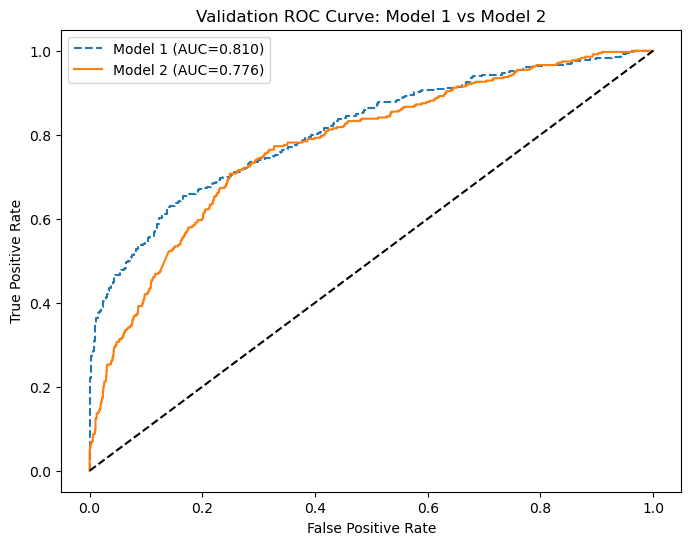

In [43]:
#Roc Curve Comparison
fpr1, tpr1, _ = roc_curve(y_valid, valid_prob_1)
fpr2, tpr2, _ = roc_curve(y_valid, valid_prob_2)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, label=f"Model 1 (AUC={valid_auc_1:.3f})", linestyle='--')
plt.plot(fpr2, tpr2, label=f"Model 2 (AUC={valid_auc_2:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve: Model 1 vs Model 2")
plt.legend()
plt.show()

### 2.B3 (3) Discuss which model performs better

**Conclusion**

Across two models, Model 1 simply does better than Model 2. It has higher accuracy on both the validation set (0.858 vs 0.812) and the test set (0.879 vs 0.849), and it also shows better AUC scores (0.810 vs 0.776 on validation, 0.855 vs 0.799 on test). Its ROC curve stays above Model 2’s at all points, meaning Model 1 is better at separating risky customers from safe ones.

Model 2 performs worse even though it has three hidden layers. The dataset isn’t big or complex enough to actually benefit from a deeper network. More layers = more parameters to learn, and when the data can’t support that complexity, the model starts to pick up noise instead of useful patterns. That’s why it shows mild overfitting and weaker generalization.

To sum up, Model 1 is the more stable and trustworthy model for predicting loan defaults. Its simpler design fits this dataset better and leads to more consistent, reliable predictions for the bank.
